<a href="https://colab.research.google.com/github/N-sema/MNIST_ANN/blob/main/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
"""
MNIST veri seti

image processing:
histogram eşitleme : kontrast iyileştirme
gaussian blur gürültü azaltma
canny edge detection kenar tespiti

ANN ile MNIST veri setini sınıflandırma

Libraies :
tenserflow : KERAS ile aNN modeli oluşturma ve eğitim
matplotlib : görselleştirme
cv2 : opencv görüntü işleme (iimage processing)
"""

!pip install tensorflow matplotlib opencv-python

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # ANN modeli için
from tensorflow.keras.layers import Dense, Dropout # ANN katmanları için
from tensorflow.keras.optimizers import Adam # optimizer


In [36]:
#load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (f"x_train shape : {x_train.shape}")
print (f"y_train shape : {y_train.shape}")

"""
x_train shape : (60000, 28, 28)
y_train shape : (60000,) bu bir vektör olduğunu gösteriyor

"""

x_train shape : (60000, 28, 28)
y_train shape : (60000,)


'\nx_train shape : (60000, 28, 28)\ny_train shape : (60000,) bu bir vektör olduğunu gösteriyor\n\n'

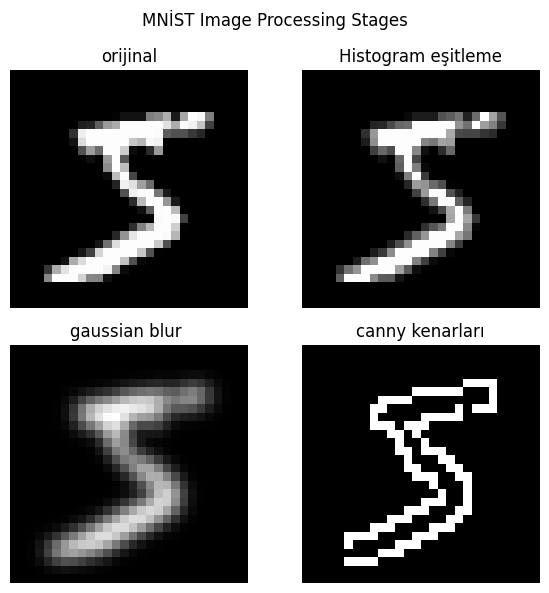

In [37]:
#image preprocessing
img = x_train[0] # ilk resmi al
stages = {"orijinal" : img}

#histogram eşitleme
eq = cv2.equalizeHist(img) #histogram eşitleme
stages["Histogram eşitleme"]= eq

#gaussian blur : gürültüyü azaltma
blur = cv2.GaussianBlur(eq,(5,5),0) #0 ortalamalı
stages ["gaussian blur "]= blur

#canny ile kenar tespiti
edges = cv2.Canny(blur,50,150) #kenar tespiti 50 ve 150 alt ve üst eşik değerleri
# piksel farkından ötürü 150 ve üstündeki değerler kenar kabul edilir
stages["canny kenarları"] = edges

# gorselleştirme
fig, axes = plt.subplots(2,2, figsize= (6,6)) # 2,2  = 2 satır 2 sütün dan 4 grid oluşur
axes= axes.flat
for ax,(title,im) in zip(axes, stages.items()):
  ax.imshow (im,cmap = "gray")
  ax.set_title(title)
  ax.axis("off")
plt.suptitle("MNİST Image Processing Stages")
plt.tight_layout()
plt.show()

#preprocessing fonksiyonu

def preprocess_image(img):
  """
  -histogram eşitleme
  -gaussian blur
  -canny ile kenar tespiti
  -flattering: 28x28 boyutundan 784 boyutuna cevirme
  -normalizasyon : 0-255 arasından 0-1 arasina cevirme
  """

  img_eq= cv2.equalizeHist(img) #histogram eşitleme
  img_blur = cv2.GaussianBlur(img_eq, (5,5),0) # gaussian blur
  img_edges = cv2.Canny(img_blur, 50,150 ) # canny kenar tespiti
  features= img_edges.flatten()/255.0 # flattering
  return features

num_train=10000
num_test=2000

X_train = np.array([preprocess_image(img) for img in x_train[:num_train]])
y_train_sub= y_train[:num_train]

X_test =np.array([preprocess_image(img) for img in x_test[:num_test] ])
y_test_sub= y_test[:num_test]



In [38]:
# ANN model creation
model = Sequential([
    Dense(128 , activation="relu", input_shape= (784,)), #ilk katman , 128 nöron 28x28 = 784 boyutunda
    Dropout(0.5), #dropout katmanı overfiitingi azaltmak için , %50 dropout
    Dense(64,activation="relu") , # ikinci katman 64 nöron
    Dense (10, activation="softmax") # cıkıs katmanı 10 nöron (0-9 rakamları totoalde 10 sınıf olduğu için 10 olmak zorunda )

])

#compile model
model.compile(
    optimizer= Adam(learning_rate=0.001), # optimizer
    loss= "sparse_categorical_crossentropy", # kayıp fonksiyonu
    metrics= ["accuracy"] # metrikler
)

print(model.summary()) # nasıl bir model inşa ettiğimizi gösterir


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
#ann model training
history = model.fit(
    X_train, y_train_sub,
    validation_data= (X_test, y_test_sub),
    epochs= 10,
    batch_size=32,
    verbose = 2 # eğitim sırasında ekrana ne kadar ve nasıl bilgi yazdırılacağını belirler.
#Yani tamamen çıktı seviyesi — modele veya öğrenmeye hiçbir etkisi yok.
)
# 4 epochtan sonra overfitting başladı accurcy val den yüksek


Epoch 1/10
313/313 - 8s - 25ms/step - accuracy: 0.6309 - loss: 1.1379 - val_accuracy: 0.8095 - val_loss: 0.6288
Epoch 2/10
313/313 - 1s - 3ms/step - accuracy: 0.8204 - loss: 0.5712 - val_accuracy: 0.8425 - val_loss: 0.5049
Epoch 3/10
313/313 - 1s - 3ms/step - accuracy: 0.8561 - loss: 0.4536 - val_accuracy: 0.8435 - val_loss: 0.4828
Epoch 4/10
313/313 - 1s - 3ms/step - accuracy: 0.8875 - loss: 0.3685 - val_accuracy: 0.8580 - val_loss: 0.4511
Epoch 5/10
313/313 - 1s - 3ms/step - accuracy: 0.9001 - loss: 0.3203 - val_accuracy: 0.8695 - val_loss: 0.4277
Epoch 6/10
313/313 - 1s - 3ms/step - accuracy: 0.9147 - loss: 0.2739 - val_accuracy: 0.8720 - val_loss: 0.4103
Epoch 7/10
313/313 - 1s - 3ms/step - accuracy: 0.9206 - loss: 0.2461 - val_accuracy: 0.8720 - val_loss: 0.4169
Epoch 8/10
313/313 - 1s - 4ms/step - accuracy: 0.9306 - loss: 0.2179 - val_accuracy: 0.8785 - val_loss: 0.4123
Epoch 9/10
313/313 - 1s - 4ms/step - accuracy: 0.9346 - loss: 0.2028 - val_accuracy: 0.8865 - val_loss: 0.4079


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.3540
Test loss : 0.4245, Test accuracy: 0.8760


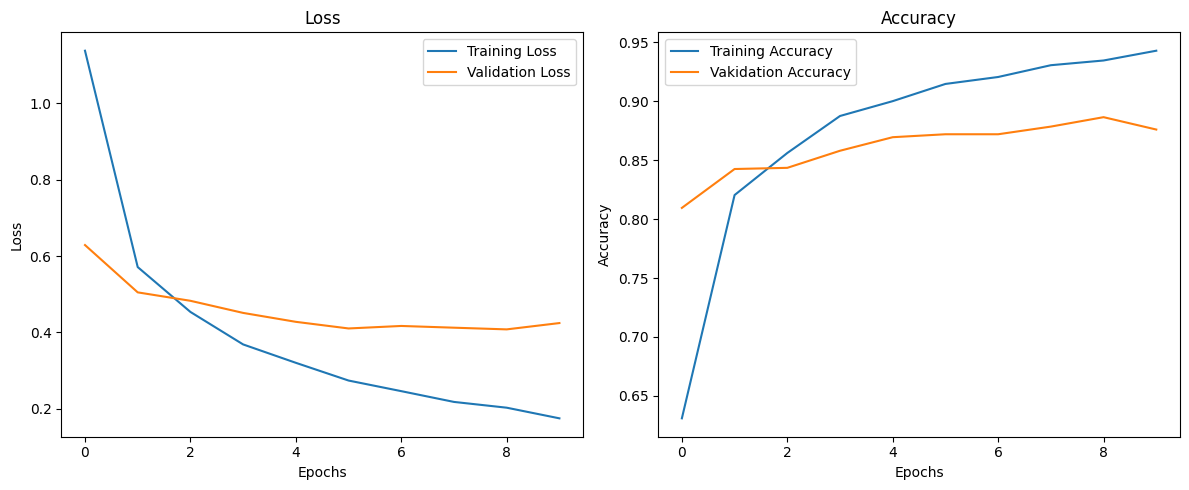

In [40]:
# evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test_sub)
print (f"Test loss : {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

#plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label= "Training Loss")
plt.plot(history.history["val_loss"] ,label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], label= "Vakidation Accuracy")
plt.title ("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout() # figür içinde bulunanları sıkıştırır
plt.show()
